In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from matplotlib.image import imread
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.layers import Dropout

C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

### plot the messy room images 

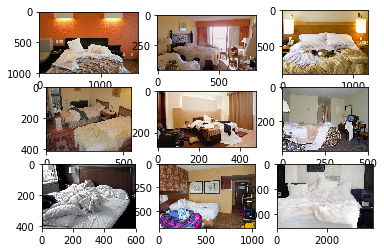

In [3]:
# plot messy photos from the  dataset

# define location of dataset
folder = 'dataset/Train/Messy'
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + '/'+'M' + str(i+1) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

### Plot the clean room image

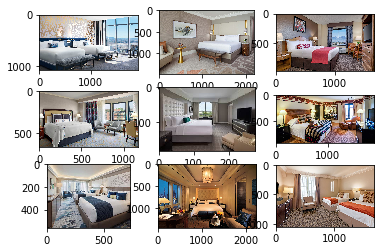

In [4]:
# plot messy photos from the  dataset

# define location of dataset
folder = 'dataset/Train/Clean'
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + '/'+'C' + str(i+1) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

### Develop a Baseline CNN Model

In [5]:
## In this section, we can develop a baseline convolutional neural network model for the messy vs. clean dataset.
## A baseline model will establish a minimum model performance to which all of our other models can be compared, 
## as well as a model architecture that we can use as the basis of study and improvement.

In [6]:
from tensorflow.keras.optimizers import SGD
# define cnn model
def define_basemodel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [7]:
model = define_basemodel()

Instructions for updating:
Colocations handled automatically by placer.


### Create Data Generator

In [8]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [9]:
train_generator = datagen.flow_from_directory(
    'dataset/Train',
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='training') # set as training data

Found 224 images belonging to 2 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    'dataset/Train', # same directory as training data
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='validation') # set as validation data

Found 56 images belonging to 2 classes.


In [11]:
history_base = model.fit_generator(train_generator,
                              steps_per_epoch=90,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 1.1785 - acc: 0.5045 - val_loss: 0.6703 - val_acc: 0.6071
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.7688 - acc: 0.5312 - val_loss: 0.8156 - val_acc: 0.4464
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.6939 - acc: 0.5045 - val_loss: 0.7025 - val_acc: 0.5714
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.6452 - acc: 0.6295 - val_loss: 0.6935 - val_acc: 0.5536
Epoch 5/15
8/8 [==============================] - 14s 2s/step - loss: 0.5833 - acc: 0.7143 - val_loss: 0.7059 - val_acc: 0.5714
Epoch 6/15
8/8 [==============================] - 14s 2s/step - loss: 0.5791 - acc: 0.6741 - val_loss: 0.7464 - val_acc: 0.5179
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.5735 - acc: 0.7143 - val_loss: 0.6946 - val_acc: 0.5714
Epoch 8/15
8/8 [==============================] - 13s 2s

### Plot the accuracy and loss

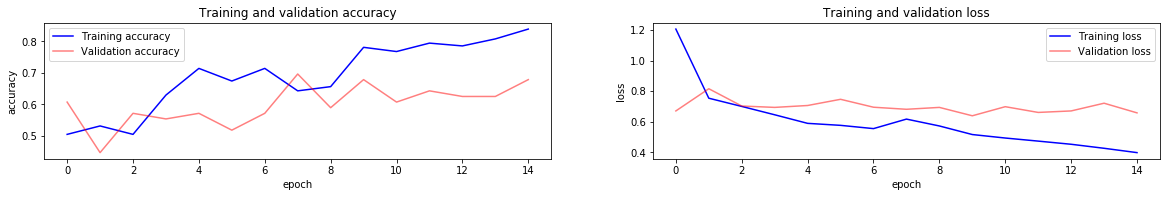

In [12]:
acc = history_base.history['acc']
val_acc = history_base.history['val_acc']
loss = history_base.history['loss']
val_loss = history_base.history['val_loss']
 
epochs = range(len(acc))

plt.figure(figsize=(20,2.5))

plt.subplot(121) 
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', alpha = 0.5,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', alpha = 0.5, label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = test_datagen.flow_from_directory('dataset/Test', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')


Found 10 images belonging to 1 classes.


In [14]:
predictions=model.predict(prediction_set)

[0.72562057]
[0.66129804]
[0.12222265]
[0.82484007]
[0.7304554]
[0.6690882]
[0.21434632]
[0.76824015]
[0.18755509]
[0.63710886]


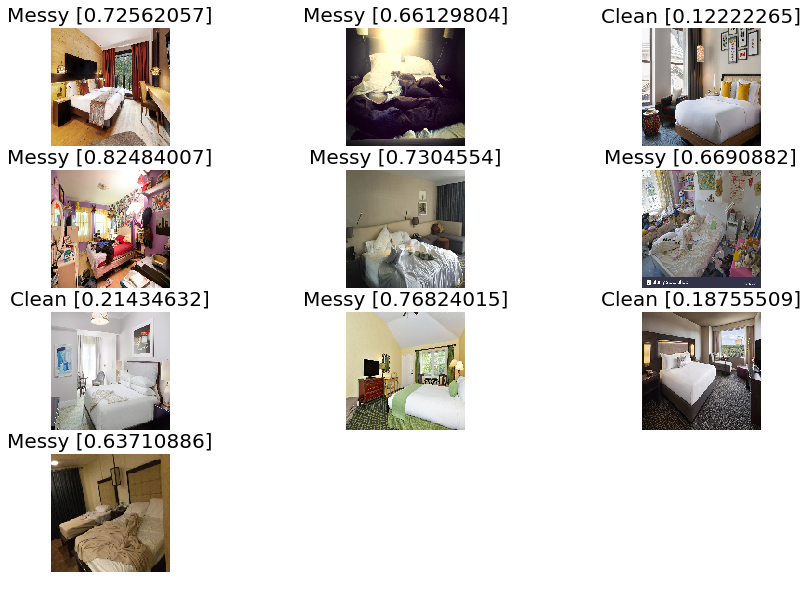

In [15]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(4,3,i+1)
    plt.imshow(prediction_set[i][0][0])
    plt.axis('off')
    plt.title("Messy "+str(predictions[i])  if predictions[i] > 0.5 else "Clean "+str(predictions[i]), fontsize=20)
    print(predictions[i])

### Model 2: Single convolutional layer

In [ ]:
def define_model_1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_1 = define_model_1()

In [ ]:
history_1 = model_1.fit_generator(train_generator,
                              steps_per_epoch=90,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=32, verbose=0)

In [ ]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'y-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'y-', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

### Model 3: 3 layers

In [ ]:
def define_model_2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_2 = define_model_2()

In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              steps_per_epoch=90,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=32, verbose=0)

In [ ]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'y-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'y-', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

### Develop Model Improvements

#### Dropout Regularization

In [ ]:
## Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, 
## which may be input variables in the data sample or activations from a previous layer. 
## It has the effect of simulating a large number of networks with very different network structures and, in turn, 
## making nodes in the network generally more robust to the inputs

In [ ]:
def define_model_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_dropout = define_model_dropout()

In [ ]:
history_dropout = model_dropout.fit_generator(train_generator,
                              steps_per_epoch=90,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=32, verbose=0)

In [ ]:
acc = history_dropout.history['acc']
val_acc = history_dropout.history['val_acc']
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'y-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'y-', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

#### Data Augmentation

In [ ]:
### create data generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'dataset/Train',
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='training') # set as training data

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    'dataset/Train', # same directory as training data
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
def define_model_augment():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
model_augment = define_model_augment()

In [ ]:
history_augment = model_augment.fit_generator(train_generator,
                              steps_per_epoch=90,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=32, verbose=0)